In [1]:
# Importing the required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'Prakasam']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,...,B,Fe,Cu,Mn,NDVI,ARVI,EVI,GCI,NDWI,Crop
2556,2559,15.49,79.5,Prakasam,Kanigiri,Baduguleru,Red,8.31,0.11,0.20,...,0.63,1.96,0.62,8.60,0.011788,0.01074,0.111391,0.048773,-0.023806,Cotton
2557,2560,15.49,79.5,Prakasam,Kanigiri,Baduguleru,Red,6.65,0.08,0.12,...,0.52,15.92,0.60,2.48,0.011788,0.01074,0.111391,0.048773,-0.023806,Cotton
2558,2561,15.49,79.5,Prakasam,Kanigiri,Baduguleru,Red,6.74,0.05,0.13,...,0.46,10.92,0.66,15.36,0.011788,0.01074,0.111391,0.048773,-0.023806,Cotton
2559,2562,15.49,79.5,Prakasam,Kanigiri,Baduguleru,Red,6.31,0.03,0.16,...,0.44,7.72,0.62,16.22,0.011788,0.01074,0.111391,0.048773,-0.023806,Cotton
2560,2563,15.49,79.5,Prakasam,Kanigiri,Baduguleru,Red,8.60,0.09,0.09,...,0.49,0.92,0.28,4.76,0.011788,0.01074,0.111391,0.048773,-0.023806,Cotton


In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village', 'ARVI', 'NDVI', 'GCI', 'NDWI'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,EVI
count,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000
mean,7.689732,0.334247,0.367505,12.356082,201.072165,1851.701031,413.552577,18.865711,0.530144,1.198804,10.746969,1.190186,11.690330,0.124027
std,1.100884,1.313235,0.275873,10.092348,172.494236,1443.287141,372.891704,58.008623,0.570159,1.293075,10.337956,0.691945,5.422488,0.055346
min,4.650000,0.010000,0.010000,1.030000,22.000000,67.000000,17.000000,0.850000,0.030000,0.100000,0.040000,0.060000,0.010000,0.028862
25%,6.800000,0.070000,0.160000,5.500000,99.000000,485.000000,118.000000,2.670000,0.270000,0.400000,3.840000,0.670000,8.100000,0.110385
50%,8.180000,0.140000,0.310000,9.470000,148.000000,1776.000000,296.000000,5.040000,0.380000,0.770000,6.650000,1.040000,10.770000,0.116524
75%,8.520000,0.260000,0.490000,16.380000,235.000000,2846.000000,610.000000,13.970000,0.590000,1.510000,14.860000,1.580000,14.040000,0.121630
max,9.600000,25.200000,1.940000,83.720000,1529.000000,6745.000000,2017.000000,1015.650000,8.790000,11.850000,73.160000,4.510000,39.840000,0.507065


In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Red', 'Black', 'Paddy'], dtype=object)

In [9]:
df['SoilType'] = df['SoilType'].replace('Black', 'Black Soil')
df['SoilType'] = df['SoilType'].replace('Red', 'Red Soil')
df = df[df['SoilType'] != 'Paddy']
df.SoilType.unique()

array(['Red Soil', 'Black Soil'], dtype=object)

In [10]:
soilCount = dict(df['SoilType'].value_counts())
soilCount

{'Red Soil': 402, 'Black Soil': 82}

<BarContainer object of 2 artists>

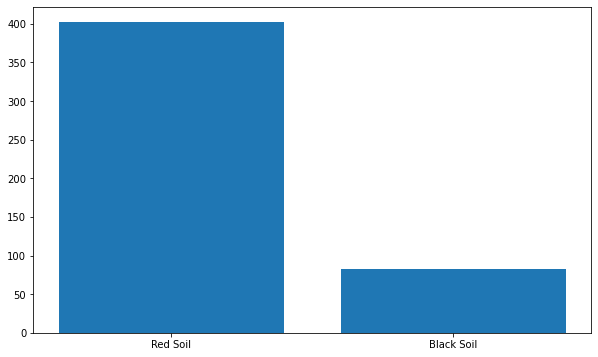

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['Cotton', 'Cowpea', 'Paddy', 'Pigeonpea', 'Green gram', 'Cow pea',
       'Tobacco', 'Maize', 'Blackgram', 'Chilli', 'Prawns', 'chickpea'],
      dtype=object)

In [14]:
df['Crop'].value_counts()

Cowpea        201
Cotton         87
Paddy          82
Pigeonpea      45
Tobacco        33
Blackgram      11
Maize          10
chickpea        5
Green gram      3
Prawns          3
Chilli          2
Cow pea         2
Name: Crop, dtype: int64

CowPea    203
Cotton     87
Paddy      82
Name: Crop, dtype: int64


<BarContainer object of 3 artists>

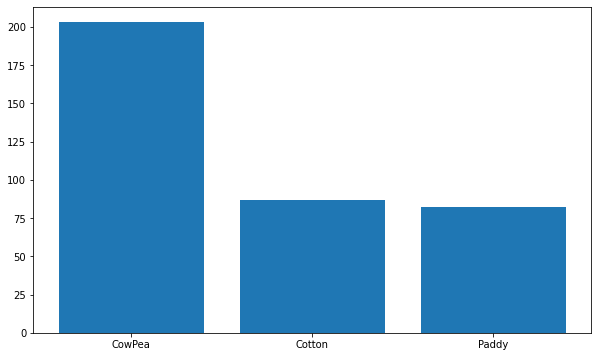

In [15]:
df['Crop'] = df['Crop'].replace('Pigeonpea', 'PigeonPea')
df['Crop'] = df['Crop'].replace(['Cow pea', 'Cowpea'], 'CowPea')
df = df[(df['Crop'] != 'Prawns') & (df['Crop'] != 'Chilli') & (df['Crop'] != 'Green gram') & (df['Crop'] != 'chickpea') & (df['Crop'] != 'Maize') & (df['Crop'] != 'Blackgram') & (df['Crop'] != 'Tobacco') & (df['Crop'] != 'PigeonPea')]

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
# Getting rid of features that have a high correlation among one another

In [17]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,EVI
pH,1.000000,0.225520,0.627646,0.145641,0.349761,0.710387,0.644894,0.306670,0.121496,0.562174,0.048194,0.365111,-0.196076,0.010625
EC,0.225520,1.000000,0.180770,0.106842,0.269661,0.134513,0.266220,0.883446,0.047044,0.671055,0.084508,0.143672,-0.001015,0.019840
OC,0.627646,0.180770,1.000000,0.347283,0.473994,0.553400,0.684945,0.280316,0.255104,0.634237,0.276063,0.522492,0.112950,-0.053753
P,0.145641,0.106842,0.347283,1.000000,0.496825,0.023922,0.320879,0.213843,0.198732,0.353209,0.439109,0.357966,0.056772,-0.005151
K,0.349761,0.269661,0.473994,0.496825,1.000000,0.147653,0.296714,0.273834,0.129357,0.456390,0.101086,0.301687,0.089939,-0.063067
Ca,0.710387,0.134513,0.553400,0.023922,0.147653,1.000000,0.659068,0.243673,0.036824,0.371171,0.096660,0.403835,0.007595,-0.009591
Mg,0.644894,0.266220,0.684945,0.320879,0.296714,0.659068,1.000000,0.468273,0.143484,0.647208,0.458539,0.718345,0.050831,-0.041033
S,0.306670,0.883446,0.280316,0.213843,0.273834,0.243673,0.468273,1.000000,0.098609,0.752408,0.276360,0.336935,0.016358,0.077496
Zn,0.121496,0.047044,0.255104,0.198732,0.129357,0.036824,0.143484,0.098609,1.000000,0.191370,0.127318,0.272886,0.083235,0.045831
B,0.562174,0.671055,0.634237,0.353209,0.456390,0.371171,0.647208,0.752408,0.191370,1.000000,0.284794,0.454291,-0.028914,-0.030038


In [18]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)

Columns to be dropped :  ['OC', 'Ca', 'Mg', 'S', 'B', 'Cu']


In [19]:
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns taken into consideration :  ['SoilType', 'pH', 'EC', 'P', 'K', 'Zn', 'Fe', 'Mn', 'EVI', 'Crop']


In [20]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [21]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

        pH    EC      P      K    Zn    Fe   Mn       EVI  Black Soil  \
2556  8.31  0.11  10.71  118.0  0.76  1.96  8.6  0.111391           0   

      Red Soil  
2556         1  
2556    Cotton
Name: Crop, dtype: object


In [22]:
# Standardizing the independent variables using Feature Scaling
sc = StandardScaler()
X[:, 0:8] = sc.fit_transform(X[:, 0:8])

In [23]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# SMOTE: Synthetic Minority Over-sampling Technique

In [24]:
# Separating the dependent and independent variables
df = df.drop(['SoilType'], axis=1)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
smote = SMOTE()
X, y = smote.fit_resample(X, y)

In [25]:
# Standardizing the independent variables using Feature Scaling
sc2 = StandardScaler()
X[:, :] = sc2.fit_transform(X[:, :])

In [26]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [27]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [28]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [29]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7647058823529411


In [30]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 71.91 %
Standard Deviation: 4.18 %


# Decision Tree Classifier

In [31]:
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [32]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [33]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7647058823529411


In [34]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 71.69 %
Standard Deviation: 6.27 %


# Random Forest Classifier

In [35]:
clf3_3 = RandomForestClassifier(random_state=0)
clf3_3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [36]:
y_test_pred = clf3_3.predict(X_test)
y_train_pred = clf3_3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [37]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8169934640522876


In [38]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3_3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 77.38 %
Standard Deviation: 7.06 %


In [39]:
pickle.dump(clf3_3, open('Prakasam_model.pkl', 'wb'))
pickle.dump(sc2, open('Prakasam_scaler.pkl', 'wb'))

# XGBoost

In [40]:
clf4_4 = HistGradientBoostingClassifier(random_state=0)
clf4_4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [41]:
y_test_pred = clf4_4.predict(X_test)
y_train_pred = clf4_4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [42]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8562091503267973


In [43]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4_4, X = X_train, y = y_train, cv = 10)

In [44]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 76.95 %
Standard Deviation: 5.11 %


In [45]:
pickle.dump(clf4_4, open('Prakasam_model.pkl', 'wb'))
pickle.dump(sc2, open('Prakasam_scaler.pkl', 'wb'))

# Multi-layer Perceptron Classifier

In [46]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [47]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [48]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.7719298245614035
Testing Accuracy:  0.7320261437908496


In [49]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 67.30 %
Standard Deviation: 6.20 %


# Catboost

In [ ]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 0.8637746	total: 160ms	remaining: 15.8s
1:	learn: 0.8007863	total: 161ms	remaining: 7.89s
2:	learn: 0.7533189	total: 162ms	remaining: 5.24s
3:	learn: 0.7234816	total: 163ms	remaining: 3.91s
4:	learn: 0.6949717	total: 163ms	remaining: 3.11s
5:	learn: 0.6675968	total: 164ms	remaining: 2.57s
6:	learn: 0.6427485	total: 165ms	remaining: 2.19s
7:	learn: 0.6417357	total: 165ms	remaining: 1.9s
8:	learn: 0.6248270	total: 166ms	remaining: 1.68s
9:	learn: 0.6172407	total: 166ms	remaining: 1.5s
10:	learn: 0.5993717	total: 167ms	remaining: 1.35s
11:	learn: 0.5869638	total: 168ms	remaining: 1.23s
12:	learn: 0.5751343	total: 169ms	remaining: 1.13s
13:	learn: 0.5644255	total: 169ms	remaining: 1.04s
14:	learn: 0.5569475	total: 170ms	remaining: 961ms
15:	learn: 0.5369142	total: 170ms	remaining: 893ms
16:	learn: 0.5295533	total: 171ms	remaining: 833ms
17:	learn: 0.5125640	total: 171ms	remaining: 780ms
18:	learn: 0.5056938	total: 172ms	remaining: 733ms
19:	learn: 0.4982384	total: 172ms	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.7864111863
bestIteration = 99

Training on fold [1/5]

bestTest = 0.7355118282
bestIteration = 99

Training on fold [2/5]

bestTest = 0.8014159463
bestIteration = 99

Training on fold [3/5]

bestTest = 0.7986114856
bestIteration = 99

Training on fold [4/5]

bestTest = 0.7646625772
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.0879463	test: 1.0903452	best: 1.0903452 (0)	total: 1.69ms	remaining: 1.69s
1:	learn: 1.0738567	test: 1.0811508	best: 1.0811508 (1)	total: 3.17ms	remaining: 1.58s
2:	learn: 1.0617825	test: 1.0727207	best: 1.0727207 (2)	total: 4.56ms	remaining: 1.51s
3:	learn: 1.0531544	test: 1.0660513	best: 1.0660513 (3)	total: 6.28ms	remaining: 1.56s
4:	learn: 1.0394526	test: 1.0564053	best: 1.0564053 (4)	total: 7.67ms	remaining: 1.52s
5:	learn: 1.0242712	test: 1.0446719	best: 1.0446719 (5)	total: 8.62ms	remaining: 1.43s
6:	learn: 1.0094497	test: 1.0348424	best: 1.0348424 (6)	total: 9.79ms	remaining: 1.39s
7:	learn: 0.9980165	test: 1.0261967	best: 1.0261967 (7)	total: 11.2ms	remaining: 1.38s
8:	learn: 0.9867027	test: 1.0168826	best: 1.0168826 (8)	total: 12.4ms	remaining: 1.37s
9:	learn: 0.9765890	test: 1.0097440	best: 1.0097440 (9)	total: 13.8ms	remaining: 1.37s
10:	learn: 0.9696337	test: 1.0036574	best: 1.0036574 (10)	total: 14.8ms	remaining: 1.33s
11:	learn: 0.9579197	test: 0.9941668	best

139:	learn: 0.5603301	test: 0.7234952	best: 0.7234952 (139)	total: 165ms	remaining: 1.01s
140:	learn: 0.5592547	test: 0.7232102	best: 0.7232102 (140)	total: 167ms	remaining: 1.02s
141:	learn: 0.5582837	test: 0.7230124	best: 0.7230124 (141)	total: 168ms	remaining: 1.02s
142:	learn: 0.5571289	test: 0.7223551	best: 0.7223551 (142)	total: 170ms	remaining: 1.01s
143:	learn: 0.5562947	test: 0.7212938	best: 0.7212938 (143)	total: 171ms	remaining: 1.01s
144:	learn: 0.5546516	test: 0.7206248	best: 0.7206248 (144)	total: 172ms	remaining: 1.01s
145:	learn: 0.5531441	test: 0.7201855	best: 0.7201855 (145)	total: 173ms	remaining: 1.01s
146:	learn: 0.5520231	test: 0.7195015	best: 0.7195015 (146)	total: 174ms	remaining: 1.01s
147:	learn: 0.5504367	test: 0.7181102	best: 0.7181102 (147)	total: 175ms	remaining: 1.01s
148:	learn: 0.5492181	test: 0.7164797	best: 0.7164797 (148)	total: 176ms	remaining: 1.01s
149:	learn: 0.5486957	test: 0.7157689	best: 0.7157689 (149)	total: 177ms	remaining: 1s
150:	learn: 0

280:	learn: 0.4341870	test: 0.6455079	best: 0.6455079 (280)	total: 339ms	remaining: 868ms
281:	learn: 0.4331445	test: 0.6456514	best: 0.6455079 (280)	total: 341ms	remaining: 868ms
282:	learn: 0.4325490	test: 0.6457891	best: 0.6455079 (280)	total: 343ms	remaining: 868ms
283:	learn: 0.4315377	test: 0.6460649	best: 0.6455079 (280)	total: 344ms	remaining: 867ms
284:	learn: 0.4309689	test: 0.6458773	best: 0.6455079 (280)	total: 345ms	remaining: 867ms
285:	learn: 0.4303663	test: 0.6456860	best: 0.6455079 (280)	total: 347ms	remaining: 865ms
286:	learn: 0.4300421	test: 0.6457517	best: 0.6455079 (280)	total: 348ms	remaining: 864ms
287:	learn: 0.4294726	test: 0.6457269	best: 0.6455079 (280)	total: 349ms	remaining: 862ms
288:	learn: 0.4289962	test: 0.6458404	best: 0.6455079 (280)	total: 350ms	remaining: 861ms
289:	learn: 0.4281554	test: 0.6449825	best: 0.6449825 (289)	total: 351ms	remaining: 859ms
290:	learn: 0.4274471	test: 0.6441868	best: 0.6441868 (290)	total: 353ms	remaining: 860ms
291:	learn

418:	learn: 0.3474551	test: 0.6064841	best: 0.6064841 (418)	total: 515ms	remaining: 713ms
419:	learn: 0.3470349	test: 0.6061175	best: 0.6061175 (419)	total: 517ms	remaining: 713ms
420:	learn: 0.3467098	test: 0.6057790	best: 0.6057790 (420)	total: 518ms	remaining: 712ms
421:	learn: 0.3463283	test: 0.6057511	best: 0.6057511 (421)	total: 519ms	remaining: 711ms
422:	learn: 0.3459251	test: 0.6056245	best: 0.6056245 (422)	total: 520ms	remaining: 710ms
423:	learn: 0.3453435	test: 0.6048654	best: 0.6048654 (423)	total: 522ms	remaining: 709ms
424:	learn: 0.3449931	test: 0.6043929	best: 0.6043929 (424)	total: 523ms	remaining: 707ms
425:	learn: 0.3443208	test: 0.6043421	best: 0.6043421 (425)	total: 524ms	remaining: 706ms
426:	learn: 0.3440636	test: 0.6044078	best: 0.6043421 (425)	total: 525ms	remaining: 705ms
427:	learn: 0.3433517	test: 0.6043288	best: 0.6043288 (427)	total: 527ms	remaining: 704ms
428:	learn: 0.3431919	test: 0.6041087	best: 0.6041087 (428)	total: 528ms	remaining: 703ms
429:	learn

558:	learn: 0.2877888	test: 0.5805418	best: 0.5804521 (556)	total: 689ms	remaining: 544ms
559:	learn: 0.2874448	test: 0.5802830	best: 0.5802830 (559)	total: 691ms	remaining: 543ms
560:	learn: 0.2870897	test: 0.5802233	best: 0.5802233 (560)	total: 692ms	remaining: 542ms
561:	learn: 0.2867307	test: 0.5795975	best: 0.5795975 (561)	total: 693ms	remaining: 540ms
562:	learn: 0.2860782	test: 0.5796959	best: 0.5795975 (561)	total: 694ms	remaining: 539ms
563:	learn: 0.2855693	test: 0.5798059	best: 0.5795975 (561)	total: 695ms	remaining: 538ms
564:	learn: 0.2852349	test: 0.5793906	best: 0.5793906 (564)	total: 697ms	remaining: 536ms
565:	learn: 0.2846316	test: 0.5792783	best: 0.5792783 (565)	total: 698ms	remaining: 535ms
566:	learn: 0.2844094	test: 0.5792312	best: 0.5792312 (566)	total: 699ms	remaining: 534ms
567:	learn: 0.2838480	test: 0.5795017	best: 0.5792312 (566)	total: 701ms	remaining: 533ms
568:	learn: 0.2834587	test: 0.5794828	best: 0.5792312 (566)	total: 702ms	remaining: 532ms
569:	learn

697:	learn: 0.2438239	test: 0.5655244	best: 0.5649319 (691)	total: 863ms	remaining: 373ms
698:	learn: 0.2435758	test: 0.5652460	best: 0.5649319 (691)	total: 865ms	remaining: 372ms
699:	learn: 0.2432829	test: 0.5651630	best: 0.5649319 (691)	total: 867ms	remaining: 371ms
700:	learn: 0.2430897	test: 0.5648468	best: 0.5648468 (700)	total: 868ms	remaining: 370ms
701:	learn: 0.2428045	test: 0.5644077	best: 0.5644077 (701)	total: 870ms	remaining: 369ms
702:	learn: 0.2427219	test: 0.5643801	best: 0.5643801 (702)	total: 871ms	remaining: 368ms
703:	learn: 0.2424308	test: 0.5640990	best: 0.5640990 (703)	total: 872ms	remaining: 367ms
704:	learn: 0.2420999	test: 0.5635738	best: 0.5635738 (704)	total: 873ms	remaining: 365ms
705:	learn: 0.2416867	test: 0.5638327	best: 0.5635738 (704)	total: 874ms	remaining: 364ms
706:	learn: 0.2410909	test: 0.5635668	best: 0.5635668 (706)	total: 876ms	remaining: 363ms
707:	learn: 0.2408485	test: 0.5631885	best: 0.5631885 (707)	total: 877ms	remaining: 362ms
708:	learn

834:	learn: 0.2115337	test: 0.5563230	best: 0.5563230 (834)	total: 1.04s	remaining: 205ms
835:	learn: 0.2113834	test: 0.5562776	best: 0.5562776 (835)	total: 1.04s	remaining: 204ms
836:	learn: 0.2110926	test: 0.5558369	best: 0.5558369 (836)	total: 1.04s	remaining: 203ms
837:	learn: 0.2108322	test: 0.5559299	best: 0.5558369 (836)	total: 1.04s	remaining: 201ms
838:	learn: 0.2106432	test: 0.5558834	best: 0.5558369 (836)	total: 1.04s	remaining: 200ms
839:	learn: 0.2102735	test: 0.5557047	best: 0.5557047 (839)	total: 1.04s	remaining: 199ms
840:	learn: 0.2100149	test: 0.5557959	best: 0.5557047 (839)	total: 1.05s	remaining: 198ms
841:	learn: 0.2099203	test: 0.5555954	best: 0.5555954 (841)	total: 1.05s	remaining: 197ms
842:	learn: 0.2096942	test: 0.5555724	best: 0.5555724 (842)	total: 1.05s	remaining: 195ms
843:	learn: 0.2093382	test: 0.5555637	best: 0.5555637 (843)	total: 1.05s	remaining: 194ms
844:	learn: 0.2089177	test: 0.5558866	best: 0.5555637 (843)	total: 1.05s	remaining: 193ms
845:	learn

966:	learn: 0.1850887	test: 0.5462924	best: 0.5462707 (962)	total: 1.21s	remaining: 41.3ms
967:	learn: 0.1849042	test: 0.5462865	best: 0.5462707 (962)	total: 1.21s	remaining: 40.1ms
968:	learn: 0.1846585	test: 0.5463771	best: 0.5462707 (962)	total: 1.21s	remaining: 38.8ms
969:	learn: 0.1844072	test: 0.5461220	best: 0.5461220 (969)	total: 1.22s	remaining: 37.6ms
970:	learn: 0.1841854	test: 0.5456263	best: 0.5456263 (970)	total: 1.22s	remaining: 36.3ms
971:	learn: 0.1839854	test: 0.5455315	best: 0.5455315 (971)	total: 1.22s	remaining: 35.1ms
972:	learn: 0.1838052	test: 0.5455554	best: 0.5455315 (971)	total: 1.22s	remaining: 33.8ms
973:	learn: 0.1835786	test: 0.5455435	best: 0.5455315 (971)	total: 1.22s	remaining: 32.6ms
974:	learn: 0.1834828	test: 0.5453065	best: 0.5453065 (974)	total: 1.22s	remaining: 31.3ms
975:	learn: 0.1832222	test: 0.5452412	best: 0.5452412 (975)	total: 1.22s	remaining: 30.1ms
976:	learn: 0.1830388	test: 0.5449033	best: 0.5449033 (976)	total: 1.22s	remaining: 28.8ms

81:	learn: 0.4514795	test: 0.6766280	best: 0.6766280 (81)	total: 129ms	remaining: 1.45s
82:	learn: 0.4475647	test: 0.6783487	best: 0.6766280 (81)	total: 131ms	remaining: 1.45s
83:	learn: 0.4450096	test: 0.6768597	best: 0.6766280 (81)	total: 133ms	remaining: 1.45s
84:	learn: 0.4420489	test: 0.6732603	best: 0.6732603 (84)	total: 135ms	remaining: 1.45s
85:	learn: 0.4394869	test: 0.6732939	best: 0.6732603 (84)	total: 136ms	remaining: 1.45s
86:	learn: 0.4361991	test: 0.6732259	best: 0.6732259 (86)	total: 138ms	remaining: 1.45s
87:	learn: 0.4327755	test: 0.6743330	best: 0.6732259 (86)	total: 140ms	remaining: 1.45s
88:	learn: 0.4310785	test: 0.6733278	best: 0.6732259 (86)	total: 141ms	remaining: 1.44s
89:	learn: 0.4297090	test: 0.6728280	best: 0.6728280 (89)	total: 143ms	remaining: 1.44s
90:	learn: 0.4273296	test: 0.6732487	best: 0.6728280 (89)	total: 144ms	remaining: 1.44s
91:	learn: 0.4259525	test: 0.6724450	best: 0.6724450 (91)	total: 146ms	remaining: 1.44s
92:	learn: 0.4238061	test: 0.672

195:	learn: 0.2635414	test: 0.6086595	best: 0.6070719 (194)	total: 303ms	remaining: 1.24s
196:	learn: 0.2625402	test: 0.6075397	best: 0.6070719 (194)	total: 305ms	remaining: 1.24s
197:	learn: 0.2621567	test: 0.6076036	best: 0.6070719 (194)	total: 306ms	remaining: 1.24s
198:	learn: 0.2606529	test: 0.6077987	best: 0.6070719 (194)	total: 307ms	remaining: 1.24s
199:	learn: 0.2594391	test: 0.6072824	best: 0.6070719 (194)	total: 308ms	remaining: 1.23s
200:	learn: 0.2588986	test: 0.6065043	best: 0.6065043 (200)	total: 309ms	remaining: 1.23s
201:	learn: 0.2575998	test: 0.6068056	best: 0.6065043 (200)	total: 310ms	remaining: 1.23s
202:	learn: 0.2571239	test: 0.6064153	best: 0.6064153 (202)	total: 311ms	remaining: 1.22s
203:	learn: 0.2554287	test: 0.6075329	best: 0.6064153 (202)	total: 313ms	remaining: 1.22s
204:	learn: 0.2542747	test: 0.6074006	best: 0.6064153 (202)	total: 314ms	remaining: 1.22s
205:	learn: 0.2528284	test: 0.6071538	best: 0.6064153 (202)	total: 315ms	remaining: 1.21s
206:	learn

328:	learn: 0.1688308	test: 0.5756049	best: 0.5738903 (326)	total: 476ms	remaining: 971ms
329:	learn: 0.1682741	test: 0.5739431	best: 0.5738903 (326)	total: 478ms	remaining: 970ms
330:	learn: 0.1680095	test: 0.5726625	best: 0.5726625 (330)	total: 479ms	remaining: 969ms
331:	learn: 0.1674823	test: 0.5724493	best: 0.5724493 (331)	total: 480ms	remaining: 966ms
332:	learn: 0.1669823	test: 0.5715407	best: 0.5715407 (332)	total: 481ms	remaining: 964ms
333:	learn: 0.1667903	test: 0.5715633	best: 0.5715407 (332)	total: 483ms	remaining: 962ms
334:	learn: 0.1662378	test: 0.5727819	best: 0.5715407 (332)	total: 484ms	remaining: 960ms
335:	learn: 0.1660266	test: 0.5720079	best: 0.5715407 (332)	total: 485ms	remaining: 959ms
336:	learn: 0.1654188	test: 0.5715629	best: 0.5715407 (332)	total: 486ms	remaining: 957ms
337:	learn: 0.1646617	test: 0.5716607	best: 0.5715407 (332)	total: 487ms	remaining: 954ms
338:	learn: 0.1643904	test: 0.5714501	best: 0.5714501 (338)	total: 488ms	remaining: 952ms
339:	learn

458:	learn: 0.1194350	test: 0.5566358	best: 0.5542359 (427)	total: 649ms	remaining: 764ms
459:	learn: 0.1192664	test: 0.5566879	best: 0.5542359 (427)	total: 650ms	remaining: 763ms
460:	learn: 0.1188125	test: 0.5578773	best: 0.5542359 (427)	total: 652ms	remaining: 762ms
461:	learn: 0.1186128	test: 0.5583252	best: 0.5542359 (427)	total: 653ms	remaining: 760ms
462:	learn: 0.1180461	test: 0.5576927	best: 0.5542359 (427)	total: 654ms	remaining: 758ms
463:	learn: 0.1176690	test: 0.5578090	best: 0.5542359 (427)	total: 655ms	remaining: 756ms
464:	learn: 0.1175794	test: 0.5574818	best: 0.5542359 (427)	total: 656ms	remaining: 755ms
465:	learn: 0.1173209	test: 0.5576314	best: 0.5542359 (427)	total: 657ms	remaining: 753ms
466:	learn: 0.1168796	test: 0.5575769	best: 0.5542359 (427)	total: 658ms	remaining: 751ms
467:	learn: 0.1166754	test: 0.5575440	best: 0.5542359 (427)	total: 659ms	remaining: 749ms
468:	learn: 0.1163303	test: 0.5569370	best: 0.5542359 (427)	total: 660ms	remaining: 748ms
469:	learn

596:	learn: 0.0862236	test: 0.5606789	best: 0.5542359 (427)	total: 820ms	remaining: 554ms
597:	learn: 0.0860687	test: 0.5614454	best: 0.5542359 (427)	total: 823ms	remaining: 553ms
598:	learn: 0.0856920	test: 0.5618592	best: 0.5542359 (427)	total: 825ms	remaining: 552ms
599:	learn: 0.0855097	test: 0.5612663	best: 0.5542359 (427)	total: 827ms	remaining: 551ms
600:	learn: 0.0854570	test: 0.5607416	best: 0.5542359 (427)	total: 828ms	remaining: 550ms
601:	learn: 0.0852743	test: 0.5608372	best: 0.5542359 (427)	total: 830ms	remaining: 549ms
602:	learn: 0.0850802	test: 0.5614707	best: 0.5542359 (427)	total: 832ms	remaining: 547ms
603:	learn: 0.0849975	test: 0.5614665	best: 0.5542359 (427)	total: 833ms	remaining: 546ms
604:	learn: 0.0848807	test: 0.5616922	best: 0.5542359 (427)	total: 835ms	remaining: 545ms
605:	learn: 0.0847277	test: 0.5616417	best: 0.5542359 (427)	total: 836ms	remaining: 544ms
606:	learn: 0.0845504	test: 0.5623271	best: 0.5542359 (427)	total: 837ms	remaining: 542ms
607:	learn

715:	learn: 0.0681433	test: 0.5654372	best: 0.5542359 (427)	total: 991ms	remaining: 393ms
716:	learn: 0.0680139	test: 0.5656433	best: 0.5542359 (427)	total: 993ms	remaining: 392ms
717:	learn: 0.0679394	test: 0.5651047	best: 0.5542359 (427)	total: 995ms	remaining: 391ms
718:	learn: 0.0678714	test: 0.5651633	best: 0.5542359 (427)	total: 996ms	remaining: 389ms
719:	learn: 0.0678483	test: 0.5652952	best: 0.5542359 (427)	total: 997ms	remaining: 388ms
720:	learn: 0.0676843	test: 0.5651838	best: 0.5542359 (427)	total: 998ms	remaining: 386ms
721:	learn: 0.0675742	test: 0.5652541	best: 0.5542359 (427)	total: 999ms	remaining: 385ms
722:	learn: 0.0674170	test: 0.5652472	best: 0.5542359 (427)	total: 1s	remaining: 383ms
723:	learn: 0.0672813	test: 0.5657821	best: 0.5542359 (427)	total: 1s	remaining: 382ms
724:	learn: 0.0671757	test: 0.5655114	best: 0.5542359 (427)	total: 1s	remaining: 380ms
725:	learn: 0.0670516	test: 0.5648880	best: 0.5542359 (427)	total: 1s	remaining: 379ms
726:	learn: 0.0669328	

848:	learn: 0.0542566	test: 0.5750711	best: 0.5542359 (427)	total: 1.16s	remaining: 207ms
849:	learn: 0.0541970	test: 0.5754318	best: 0.5542359 (427)	total: 1.17s	remaining: 206ms
850:	learn: 0.0541054	test: 0.5746296	best: 0.5542359 (427)	total: 1.17s	remaining: 204ms
851:	learn: 0.0539384	test: 0.5754687	best: 0.5542359 (427)	total: 1.17s	remaining: 203ms
852:	learn: 0.0537813	test: 0.5751356	best: 0.5542359 (427)	total: 1.17s	remaining: 202ms
853:	learn: 0.0536253	test: 0.5750436	best: 0.5542359 (427)	total: 1.17s	remaining: 200ms
854:	learn: 0.0535843	test: 0.5756107	best: 0.5542359 (427)	total: 1.17s	remaining: 199ms
855:	learn: 0.0535025	test: 0.5756706	best: 0.5542359 (427)	total: 1.17s	remaining: 197ms
856:	learn: 0.0534223	test: 0.5754257	best: 0.5542359 (427)	total: 1.18s	remaining: 196ms
857:	learn: 0.0533350	test: 0.5757860	best: 0.5542359 (427)	total: 1.18s	remaining: 195ms
858:	learn: 0.0533100	test: 0.5755952	best: 0.5542359 (427)	total: 1.18s	remaining: 193ms
859:	learn

965:	learn: 0.0453788	test: 0.5782485	best: 0.5542359 (427)	total: 1.34s	remaining: 47ms
966:	learn: 0.0453113	test: 0.5774019	best: 0.5542359 (427)	total: 1.34s	remaining: 45.7ms
967:	learn: 0.0452674	test: 0.5773385	best: 0.5542359 (427)	total: 1.34s	remaining: 44.3ms
968:	learn: 0.0452127	test: 0.5777564	best: 0.5542359 (427)	total: 1.34s	remaining: 42.9ms
969:	learn: 0.0451373	test: 0.5777930	best: 0.5542359 (427)	total: 1.34s	remaining: 41.5ms
970:	learn: 0.0450547	test: 0.5771270	best: 0.5542359 (427)	total: 1.34s	remaining: 40.1ms
971:	learn: 0.0449928	test: 0.5772131	best: 0.5542359 (427)	total: 1.34s	remaining: 38.7ms
972:	learn: 0.0449333	test: 0.5775608	best: 0.5542359 (427)	total: 1.34s	remaining: 37.3ms
973:	learn: 0.0449009	test: 0.5776092	best: 0.5542359 (427)	total: 1.35s	remaining: 36ms
974:	learn: 0.0448638	test: 0.5771730	best: 0.5542359 (427)	total: 1.35s	remaining: 34.6ms
975:	learn: 0.0448143	test: 0.5769965	best: 0.5542359 (427)	total: 1.35s	remaining: 33.2ms
976

69:	learn: 0.6327800	test: 0.7959719	best: 0.7959719 (69)	total: 269ms	remaining: 3.58s
70:	learn: 0.6297736	test: 0.7940685	best: 0.7940685 (70)	total: 274ms	remaining: 3.58s
71:	learn: 0.6275950	test: 0.7926706	best: 0.7926706 (71)	total: 279ms	remaining: 3.59s
72:	learn: 0.6244058	test: 0.7913041	best: 0.7913041 (72)	total: 282ms	remaining: 3.58s
73:	learn: 0.6205144	test: 0.7879448	best: 0.7879448 (73)	total: 286ms	remaining: 3.57s
74:	learn: 0.6177965	test: 0.7849745	best: 0.7849745 (74)	total: 290ms	remaining: 3.57s
75:	learn: 0.6149222	test: 0.7839723	best: 0.7839723 (75)	total: 295ms	remaining: 3.58s
76:	learn: 0.6115679	test: 0.7815799	best: 0.7815799 (76)	total: 299ms	remaining: 3.58s
77:	learn: 0.6081990	test: 0.7807989	best: 0.7807989 (77)	total: 304ms	remaining: 3.59s
78:	learn: 0.6055897	test: 0.7790007	best: 0.7790007 (78)	total: 308ms	remaining: 3.59s
79:	learn: 0.6030229	test: 0.7783101	best: 0.7783101 (79)	total: 312ms	remaining: 3.59s
80:	learn: 0.6002509	test: 0.776

176:	learn: 0.4358231	test: 0.6981136	best: 0.6981136 (176)	total: 651ms	remaining: 3.02s
177:	learn: 0.4349485	test: 0.6968420	best: 0.6968420 (177)	total: 656ms	remaining: 3.03s
178:	learn: 0.4334734	test: 0.6951185	best: 0.6951185 (178)	total: 660ms	remaining: 3.03s
179:	learn: 0.4323556	test: 0.6943146	best: 0.6943146 (179)	total: 665ms	remaining: 3.03s
180:	learn: 0.4312152	test: 0.6941462	best: 0.6941462 (180)	total: 670ms	remaining: 3.03s
181:	learn: 0.4298201	test: 0.6942608	best: 0.6941462 (180)	total: 673ms	remaining: 3.02s
182:	learn: 0.4290468	test: 0.6935383	best: 0.6935383 (182)	total: 676ms	remaining: 3.02s
183:	learn: 0.4276578	test: 0.6935600	best: 0.6935383 (182)	total: 679ms	remaining: 3.01s
184:	learn: 0.4265278	test: 0.6935267	best: 0.6935267 (184)	total: 682ms	remaining: 3s
185:	learn: 0.4250548	test: 0.6940346	best: 0.6935267 (184)	total: 686ms	remaining: 3s
186:	learn: 0.4234515	test: 0.6940964	best: 0.6935267 (184)	total: 690ms	remaining: 3s
187:	learn: 0.42250

288:	learn: 0.3212880	test: 0.6488249	best: 0.6487053 (287)	total: 1.02s	remaining: 2.5s
289:	learn: 0.3202451	test: 0.6491786	best: 0.6487053 (287)	total: 1.02s	remaining: 2.5s
290:	learn: 0.3195158	test: 0.6486373	best: 0.6486373 (290)	total: 1.03s	remaining: 2.5s
291:	learn: 0.3192794	test: 0.6483627	best: 0.6483627 (291)	total: 1.03s	remaining: 2.5s
292:	learn: 0.3184635	test: 0.6479359	best: 0.6479359 (292)	total: 1.04s	remaining: 2.5s
293:	learn: 0.3177124	test: 0.6471683	best: 0.6471683 (293)	total: 1.04s	remaining: 2.5s
294:	learn: 0.3167800	test: 0.6461976	best: 0.6461976 (294)	total: 1.04s	remaining: 2.49s
295:	learn: 0.3163362	test: 0.6460644	best: 0.6460644 (295)	total: 1.04s	remaining: 2.48s
296:	learn: 0.3152188	test: 0.6459614	best: 0.6459614 (296)	total: 1.05s	remaining: 2.48s
297:	learn: 0.3143856	test: 0.6459483	best: 0.6459483 (297)	total: 1.05s	remaining: 2.48s
298:	learn: 0.3136599	test: 0.6455243	best: 0.6455243 (298)	total: 1.05s	remaining: 2.47s
299:	learn: 0.31

408:	learn: 0.2419696	test: 0.6191735	best: 0.6191735 (408)	total: 1.4s	remaining: 2.02s
409:	learn: 0.2415522	test: 0.6188410	best: 0.6188410 (409)	total: 1.4s	remaining: 2.02s
410:	learn: 0.2410432	test: 0.6186272	best: 0.6186272 (410)	total: 1.41s	remaining: 2.02s
411:	learn: 0.2404221	test: 0.6185296	best: 0.6185296 (411)	total: 1.41s	remaining: 2.01s
412:	learn: 0.2399371	test: 0.6178328	best: 0.6178328 (412)	total: 1.41s	remaining: 2.01s
413:	learn: 0.2395483	test: 0.6174814	best: 0.6174814 (413)	total: 1.42s	remaining: 2.01s
414:	learn: 0.2393246	test: 0.6173292	best: 0.6173292 (414)	total: 1.42s	remaining: 2s
415:	learn: 0.2388345	test: 0.6173406	best: 0.6173292 (414)	total: 1.42s	remaining: 2s
416:	learn: 0.2381350	test: 0.6167855	best: 0.6167855 (416)	total: 1.43s	remaining: 1.99s
417:	learn: 0.2375907	test: 0.6170050	best: 0.6167855 (416)	total: 1.43s	remaining: 1.99s
418:	learn: 0.2369605	test: 0.6170316	best: 0.6167855 (416)	total: 1.43s	remaining: 1.99s
419:	learn: 0.2363

526:	learn: 0.1922084	test: 0.6018038	best: 0.6018038 (526)	total: 1.76s	remaining: 1.58s
527:	learn: 0.1920154	test: 0.6018186	best: 0.6018038 (526)	total: 1.77s	remaining: 1.58s
528:	learn: 0.1915944	test: 0.6014890	best: 0.6014890 (528)	total: 1.77s	remaining: 1.58s
529:	learn: 0.1912379	test: 0.6009165	best: 0.6009165 (529)	total: 1.78s	remaining: 1.57s
530:	learn: 0.1910888	test: 0.6003077	best: 0.6003077 (530)	total: 1.78s	remaining: 1.57s
531:	learn: 0.1907831	test: 0.6001606	best: 0.6001606 (531)	total: 1.78s	remaining: 1.57s
532:	learn: 0.1903126	test: 0.5999144	best: 0.5999144 (532)	total: 1.79s	remaining: 1.57s
533:	learn: 0.1899120	test: 0.5995263	best: 0.5995263 (533)	total: 1.79s	remaining: 1.56s
534:	learn: 0.1896057	test: 0.5995877	best: 0.5995263 (533)	total: 1.79s	remaining: 1.56s
535:	learn: 0.1893503	test: 0.5994768	best: 0.5994768 (535)	total: 1.8s	remaining: 1.55s
536:	learn: 0.1890620	test: 0.5993219	best: 0.5993219 (536)	total: 1.8s	remaining: 1.55s
537:	learn: 

649:	learn: 0.1553695	test: 0.5895230	best: 0.5895230 (649)	total: 2.15s	remaining: 1.16s
650:	learn: 0.1550980	test: 0.5891893	best: 0.5891893 (650)	total: 2.15s	remaining: 1.15s
651:	learn: 0.1547920	test: 0.5888669	best: 0.5888669 (651)	total: 2.15s	remaining: 1.15s
652:	learn: 0.1545555	test: 0.5889045	best: 0.5888669 (651)	total: 2.16s	remaining: 1.15s
653:	learn: 0.1543351	test: 0.5890570	best: 0.5888669 (651)	total: 2.16s	remaining: 1.15s
654:	learn: 0.1540921	test: 0.5888291	best: 0.5888291 (654)	total: 2.17s	remaining: 1.14s
655:	learn: 0.1538318	test: 0.5892491	best: 0.5888291 (654)	total: 2.17s	remaining: 1.14s
656:	learn: 0.1535914	test: 0.5891469	best: 0.5888291 (654)	total: 2.17s	remaining: 1.13s
657:	learn: 0.1534303	test: 0.5892407	best: 0.5888291 (654)	total: 2.18s	remaining: 1.13s
658:	learn: 0.1530152	test: 0.5890761	best: 0.5888291 (654)	total: 2.18s	remaining: 1.13s
659:	learn: 0.1527674	test: 0.5891043	best: 0.5888291 (654)	total: 2.18s	remaining: 1.12s
660:	learn

767:	learn: 0.1297692	test: 0.5840979	best: 0.5838065 (754)	total: 2.51s	remaining: 759ms
768:	learn: 0.1295859	test: 0.5841562	best: 0.5838065 (754)	total: 2.52s	remaining: 756ms
769:	learn: 0.1294210	test: 0.5841561	best: 0.5838065 (754)	total: 2.52s	remaining: 753ms
770:	learn: 0.1293040	test: 0.5838510	best: 0.5838065 (754)	total: 2.53s	remaining: 750ms
771:	learn: 0.1290258	test: 0.5837294	best: 0.5837294 (771)	total: 2.53s	remaining: 748ms
772:	learn: 0.1289287	test: 0.5836269	best: 0.5836269 (772)	total: 2.53s	remaining: 744ms
773:	learn: 0.1286704	test: 0.5836627	best: 0.5836269 (772)	total: 2.54s	remaining: 741ms
774:	learn: 0.1284583	test: 0.5833538	best: 0.5833538 (774)	total: 2.54s	remaining: 738ms
775:	learn: 0.1282663	test: 0.5836187	best: 0.5833538 (774)	total: 2.54s	remaining: 734ms
776:	learn: 0.1281578	test: 0.5833821	best: 0.5833538 (774)	total: 2.55s	remaining: 731ms
777:	learn: 0.1279047	test: 0.5832482	best: 0.5832482 (777)	total: 2.55s	remaining: 728ms
778:	learn

883:	learn: 0.1103541	test: 0.5764065	best: 0.5762325 (882)	total: 2.88s	remaining: 377ms
884:	learn: 0.1102014	test: 0.5765052	best: 0.5762325 (882)	total: 2.88s	remaining: 374ms
885:	learn: 0.1100943	test: 0.5767417	best: 0.5762325 (882)	total: 2.88s	remaining: 371ms
886:	learn: 0.1099588	test: 0.5767599	best: 0.5762325 (882)	total: 2.89s	remaining: 368ms
887:	learn: 0.1098581	test: 0.5764659	best: 0.5762325 (882)	total: 2.89s	remaining: 365ms
888:	learn: 0.1096888	test: 0.5764205	best: 0.5762325 (882)	total: 2.9s	remaining: 362ms
889:	learn: 0.1095562	test: 0.5766317	best: 0.5762325 (882)	total: 2.9s	remaining: 359ms
890:	learn: 0.1094234	test: 0.5766011	best: 0.5762325 (882)	total: 2.91s	remaining: 356ms
891:	learn: 0.1092361	test: 0.5769817	best: 0.5762325 (882)	total: 2.91s	remaining: 353ms
892:	learn: 0.1090276	test: 0.5769354	best: 0.5762325 (882)	total: 2.92s	remaining: 350ms
893:	learn: 0.1088970	test: 0.5768359	best: 0.5762325 (882)	total: 2.92s	remaining: 346ms
894:	learn: 

993:	learn: 0.0959794	test: 0.5753258	best: 0.5752285 (948)	total: 3.26s	remaining: 19.7ms
994:	learn: 0.0958726	test: 0.5751669	best: 0.5751669 (994)	total: 3.27s	remaining: 16.4ms
995:	learn: 0.0957551	test: 0.5749276	best: 0.5749276 (995)	total: 3.27s	remaining: 13.1ms
996:	learn: 0.0956049	test: 0.5747969	best: 0.5747969 (996)	total: 3.27s	remaining: 9.85ms
997:	learn: 0.0954536	test: 0.5748472	best: 0.5747969 (996)	total: 3.28s	remaining: 6.57ms
998:	learn: 0.0953104	test: 0.5751165	best: 0.5747969 (996)	total: 3.28s	remaining: 3.29ms
999:	learn: 0.0952374	test: 0.5750910	best: 0.5747969 (996)	total: 3.29s	remaining: 0us

bestTest = 0.5747969327
bestIteration = 996

2:	loss: 0.5747969	best: 0.5436035 (0)	total: 6.31s	remaining: 6.31s
0:	learn: 1.0615813	test: 1.0671729	best: 1.0671729 (0)	total: 4.59ms	remaining: 4.58s
1:	learn: 1.0209558	test: 1.0390142	best: 1.0390142 (1)	total: 7.6ms	remaining: 3.79s
2:	learn: 0.9780112	test: 1.0053286	best: 1.0053286 (2)	total: 10.6ms	remainin

98:	learn: 0.2948224	test: 0.6094617	best: 0.6094617 (98)	total: 337ms	remaining: 3.06s
99:	learn: 0.2935665	test: 0.6086955	best: 0.6086955 (99)	total: 341ms	remaining: 3.07s
100:	learn: 0.2910632	test: 0.6067869	best: 0.6067869 (100)	total: 346ms	remaining: 3.08s
101:	learn: 0.2882997	test: 0.6072339	best: 0.6067869 (100)	total: 351ms	remaining: 3.09s
102:	learn: 0.2860980	test: 0.6073016	best: 0.6067869 (100)	total: 356ms	remaining: 3.1s
103:	learn: 0.2832563	test: 0.6054060	best: 0.6054060 (103)	total: 359ms	remaining: 3.09s
104:	learn: 0.2805716	test: 0.6062790	best: 0.6054060 (103)	total: 362ms	remaining: 3.08s
105:	learn: 0.2783604	test: 0.6063424	best: 0.6054060 (103)	total: 366ms	remaining: 3.08s
106:	learn: 0.2762737	test: 0.6062127	best: 0.6054060 (103)	total: 369ms	remaining: 3.08s
107:	learn: 0.2736686	test: 0.6064014	best: 0.6054060 (103)	total: 373ms	remaining: 3.08s
108:	learn: 0.2719268	test: 0.6062170	best: 0.6054060 (103)	total: 376ms	remaining: 3.08s
109:	learn: 0.2

211:	learn: 0.1445217	test: 0.5730470	best: 0.5713576 (210)	total: 717ms	remaining: 2.67s
212:	learn: 0.1437764	test: 0.5752285	best: 0.5713576 (210)	total: 722ms	remaining: 2.67s
213:	learn: 0.1432920	test: 0.5751199	best: 0.5713576 (210)	total: 726ms	remaining: 2.67s
214:	learn: 0.1423325	test: 0.5759192	best: 0.5713576 (210)	total: 730ms	remaining: 2.67s
215:	learn: 0.1414781	test: 0.5758651	best: 0.5713576 (210)	total: 736ms	remaining: 2.67s
216:	learn: 0.1409308	test: 0.5763239	best: 0.5713576 (210)	total: 739ms	remaining: 2.67s
217:	learn: 0.1403130	test: 0.5754878	best: 0.5713576 (210)	total: 742ms	remaining: 2.66s
218:	learn: 0.1396606	test: 0.5755650	best: 0.5713576 (210)	total: 745ms	remaining: 2.66s
219:	learn: 0.1391136	test: 0.5750069	best: 0.5713576 (210)	total: 748ms	remaining: 2.65s
220:	learn: 0.1382546	test: 0.5750589	best: 0.5713576 (210)	total: 751ms	remaining: 2.65s
221:	learn: 0.1369081	test: 0.5763836	best: 0.5713576 (210)	total: 754ms	remaining: 2.64s
222:	learn

324:	learn: 0.0852910	test: 0.5739964	best: 0.5695169 (241)	total: 1.07s	remaining: 2.22s
325:	learn: 0.0849552	test: 0.5739679	best: 0.5695169 (241)	total: 1.07s	remaining: 2.22s
326:	learn: 0.0844777	test: 0.5746609	best: 0.5695169 (241)	total: 1.08s	remaining: 2.22s
327:	learn: 0.0843089	test: 0.5739829	best: 0.5695169 (241)	total: 1.08s	remaining: 2.22s
328:	learn: 0.0840282	test: 0.5742152	best: 0.5695169 (241)	total: 1.09s	remaining: 2.22s
329:	learn: 0.0835878	test: 0.5754847	best: 0.5695169 (241)	total: 1.09s	remaining: 2.22s
330:	learn: 0.0831992	test: 0.5753485	best: 0.5695169 (241)	total: 1.1s	remaining: 2.22s
331:	learn: 0.0828878	test: 0.5753442	best: 0.5695169 (241)	total: 1.1s	remaining: 2.22s
332:	learn: 0.0826920	test: 0.5744866	best: 0.5695169 (241)	total: 1.1s	remaining: 2.21s
333:	learn: 0.0824806	test: 0.5738202	best: 0.5695169 (241)	total: 1.11s	remaining: 2.21s
334:	learn: 0.0821607	test: 0.5739416	best: 0.5695169 (241)	total: 1.11s	remaining: 2.21s
335:	learn: 0

440:	learn: 0.0576557	test: 0.5868783	best: 0.5695169 (241)	total: 1.45s	remaining: 1.84s
441:	learn: 0.0575153	test: 0.5871953	best: 0.5695169 (241)	total: 1.45s	remaining: 1.83s
442:	learn: 0.0574156	test: 0.5875371	best: 0.5695169 (241)	total: 1.46s	remaining: 1.83s
443:	learn: 0.0572638	test: 0.5880440	best: 0.5695169 (241)	total: 1.46s	remaining: 1.83s
444:	learn: 0.0571246	test: 0.5876871	best: 0.5695169 (241)	total: 1.47s	remaining: 1.83s
445:	learn: 0.0569762	test: 0.5872681	best: 0.5695169 (241)	total: 1.47s	remaining: 1.83s
446:	learn: 0.0567241	test: 0.5867327	best: 0.5695169 (241)	total: 1.47s	remaining: 1.82s
447:	learn: 0.0565352	test: 0.5866871	best: 0.5695169 (241)	total: 1.48s	remaining: 1.82s
448:	learn: 0.0564233	test: 0.5876083	best: 0.5695169 (241)	total: 1.48s	remaining: 1.82s
449:	learn: 0.0562906	test: 0.5882052	best: 0.5695169 (241)	total: 1.48s	remaining: 1.81s
450:	learn: 0.0562024	test: 0.5878286	best: 0.5695169 (241)	total: 1.49s	remaining: 1.81s
451:	learn

538:	learn: 0.0445864	test: 0.5865853	best: 0.5695169 (241)	total: 1.8s	remaining: 1.54s
539:	learn: 0.0444755	test: 0.5868135	best: 0.5695169 (241)	total: 1.81s	remaining: 1.54s
540:	learn: 0.0443797	test: 0.5869310	best: 0.5695169 (241)	total: 1.81s	remaining: 1.54s
541:	learn: 0.0442925	test: 0.5865880	best: 0.5695169 (241)	total: 1.82s	remaining: 1.53s
542:	learn: 0.0442304	test: 0.5863139	best: 0.5695169 (241)	total: 1.82s	remaining: 1.53s
543:	learn: 0.0442046	test: 0.5860885	best: 0.5695169 (241)	total: 1.82s	remaining: 1.53s
544:	learn: 0.0440978	test: 0.5860617	best: 0.5695169 (241)	total: 1.83s	remaining: 1.52s
545:	learn: 0.0439449	test: 0.5865871	best: 0.5695169 (241)	total: 1.83s	remaining: 1.52s
546:	learn: 0.0438057	test: 0.5865047	best: 0.5695169 (241)	total: 1.83s	remaining: 1.52s
547:	learn: 0.0436467	test: 0.5860497	best: 0.5695169 (241)	total: 1.84s	remaining: 1.51s
548:	learn: 0.0435623	test: 0.5858164	best: 0.5695169 (241)	total: 1.84s	remaining: 1.51s
549:	learn:

661:	learn: 0.0340403	test: 0.5909520	best: 0.5695169 (241)	total: 2.19s	remaining: 1.11s
662:	learn: 0.0339514	test: 0.5911074	best: 0.5695169 (241)	total: 2.19s	remaining: 1.11s
663:	learn: 0.0339222	test: 0.5908970	best: 0.5695169 (241)	total: 2.19s	remaining: 1.11s
664:	learn: 0.0338605	test: 0.5915755	best: 0.5695169 (241)	total: 2.2s	remaining: 1.11s
665:	learn: 0.0337934	test: 0.5914120	best: 0.5695169 (241)	total: 2.2s	remaining: 1.1s
666:	learn: 0.0337207	test: 0.5918553	best: 0.5695169 (241)	total: 2.21s	remaining: 1.1s
667:	learn: 0.0336536	test: 0.5922827	best: 0.5695169 (241)	total: 2.21s	remaining: 1.1s
668:	learn: 0.0335678	test: 0.5920280	best: 0.5695169 (241)	total: 2.21s	remaining: 1.09s
669:	learn: 0.0335026	test: 0.5922168	best: 0.5695169 (241)	total: 2.21s	remaining: 1.09s
670:	learn: 0.0334427	test: 0.5915466	best: 0.5695169 (241)	total: 2.22s	remaining: 1.09s
671:	learn: 0.0333670	test: 0.5914207	best: 0.5695169 (241)	total: 2.22s	remaining: 1.08s
672:	learn: 0.0

778:	learn: 0.0275776	test: 0.6024938	best: 0.5695169 (241)	total: 2.55s	remaining: 724ms
779:	learn: 0.0275425	test: 0.6027190	best: 0.5695169 (241)	total: 2.55s	remaining: 721ms
780:	learn: 0.0275042	test: 0.6027032	best: 0.5695169 (241)	total: 2.56s	remaining: 718ms
781:	learn: 0.0274198	test: 0.6031147	best: 0.5695169 (241)	total: 2.56s	remaining: 715ms
782:	learn: 0.0273789	test: 0.6031270	best: 0.5695169 (241)	total: 2.57s	remaining: 712ms
783:	learn: 0.0273398	test: 0.6031607	best: 0.5695169 (241)	total: 2.57s	remaining: 709ms
784:	learn: 0.0272925	test: 0.6034536	best: 0.5695169 (241)	total: 2.57s	remaining: 705ms
785:	learn: 0.0272154	test: 0.6038775	best: 0.5695169 (241)	total: 2.58s	remaining: 702ms
786:	learn: 0.0271868	test: 0.6040292	best: 0.5695169 (241)	total: 2.58s	remaining: 698ms
787:	learn: 0.0271145	test: 0.6044014	best: 0.5695169 (241)	total: 2.58s	remaining: 695ms
788:	learn: 0.0270625	test: 0.6046352	best: 0.5695169 (241)	total: 2.59s	remaining: 692ms
789:	learn

901:	learn: 0.0228218	test: 0.6067372	best: 0.5695169 (241)	total: 2.93s	remaining: 319ms
902:	learn: 0.0227856	test: 0.6067943	best: 0.5695169 (241)	total: 2.94s	remaining: 316ms
903:	learn: 0.0227567	test: 0.6065658	best: 0.5695169 (241)	total: 2.94s	remaining: 312ms
904:	learn: 0.0227227	test: 0.6062654	best: 0.5695169 (241)	total: 2.95s	remaining: 309ms
905:	learn: 0.0227001	test: 0.6059441	best: 0.5695169 (241)	total: 2.95s	remaining: 306ms
906:	learn: 0.0226693	test: 0.6058813	best: 0.5695169 (241)	total: 2.95s	remaining: 303ms
907:	learn: 0.0226347	test: 0.6058399	best: 0.5695169 (241)	total: 2.96s	remaining: 300ms
908:	learn: 0.0226231	test: 0.6061569	best: 0.5695169 (241)	total: 2.96s	remaining: 296ms
909:	learn: 0.0226037	test: 0.6063187	best: 0.5695169 (241)	total: 2.96s	remaining: 293ms
910:	learn: 0.0225664	test: 0.6063072	best: 0.5695169 (241)	total: 2.97s	remaining: 290ms
911:	learn: 0.0225344	test: 0.6067883	best: 0.5695169 (241)	total: 2.97s	remaining: 287ms
912:	learn

1:	learn: 1.0730747	test: 1.0829113	best: 1.0829113 (1)	total: 138ms	remaining: 1m 8s
2:	learn: 1.0607194	test: 1.0771182	best: 1.0771182 (2)	total: 210ms	remaining: 1m 9s
3:	learn: 1.0498649	test: 1.0692345	best: 1.0692345 (3)	total: 284ms	remaining: 1m 10s
4:	learn: 1.0356584	test: 1.0613064	best: 1.0613064 (4)	total: 359ms	remaining: 1m 11s
5:	learn: 1.0242423	test: 1.0550093	best: 1.0550093 (5)	total: 445ms	remaining: 1m 13s
6:	learn: 1.0133646	test: 1.0475585	best: 1.0475585 (6)	total: 518ms	remaining: 1m 13s
7:	learn: 1.0029685	test: 1.0400317	best: 1.0400317 (7)	total: 599ms	remaining: 1m 14s
8:	learn: 0.9912743	test: 1.0334629	best: 1.0334629 (8)	total: 674ms	remaining: 1m 14s
9:	learn: 0.9814300	test: 1.0273949	best: 1.0273949 (9)	total: 753ms	remaining: 1m 14s
10:	learn: 0.9687038	test: 1.0168078	best: 1.0168078 (10)	total: 826ms	remaining: 1m 14s
11:	learn: 0.9589681	test: 1.0109019	best: 1.0109019 (11)	total: 908ms	remaining: 1m 14s
12:	learn: 0.9505735	test: 1.0050683	best

96:	learn: 0.5098307	test: 0.7664757	best: 0.7664757 (96)	total: 7.43s	remaining: 1m 9s
97:	learn: 0.5070754	test: 0.7648999	best: 0.7648999 (97)	total: 7.51s	remaining: 1m 9s
98:	learn: 0.5045712	test: 0.7633418	best: 0.7633418 (98)	total: 7.59s	remaining: 1m 9s
99:	learn: 0.5014243	test: 0.7624544	best: 0.7624544 (99)	total: 7.67s	remaining: 1m 9s
100:	learn: 0.4984955	test: 0.7607889	best: 0.7607889 (100)	total: 7.74s	remaining: 1m 8s
101:	learn: 0.4957870	test: 0.7593476	best: 0.7593476 (101)	total: 7.83s	remaining: 1m 8s
102:	learn: 0.4927019	test: 0.7581363	best: 0.7581363 (102)	total: 7.91s	remaining: 1m 8s
103:	learn: 0.4900541	test: 0.7566454	best: 0.7566454 (103)	total: 7.98s	remaining: 1m 8s
104:	learn: 0.4874558	test: 0.7546639	best: 0.7546639 (104)	total: 8.05s	remaining: 1m 8s
105:	learn: 0.4849100	test: 0.7537844	best: 0.7537844 (105)	total: 8.12s	remaining: 1m 8s
106:	learn: 0.4822041	test: 0.7523524	best: 0.7523524 (106)	total: 8.21s	remaining: 1m 8s
107:	learn: 0.4800

189:	learn: 0.3294363	test: 0.6871003	best: 0.6871003 (189)	total: 14.6s	remaining: 1m 2s
190:	learn: 0.3279804	test: 0.6864427	best: 0.6864427 (190)	total: 14.6s	remaining: 1m 1s
191:	learn: 0.3266510	test: 0.6855100	best: 0.6855100 (191)	total: 14.7s	remaining: 1m 1s
192:	learn: 0.3251697	test: 0.6851129	best: 0.6851129 (192)	total: 14.8s	remaining: 1m 1s
193:	learn: 0.3237967	test: 0.6845142	best: 0.6845142 (193)	total: 14.9s	remaining: 1m 1s
194:	learn: 0.3222411	test: 0.6836662	best: 0.6836662 (194)	total: 14.9s	remaining: 1m 1s
195:	learn: 0.3209975	test: 0.6832022	best: 0.6832022 (195)	total: 15s	remaining: 1m 1s
196:	learn: 0.3196001	test: 0.6830780	best: 0.6830780 (196)	total: 15.1s	remaining: 1m 1s
197:	learn: 0.3182379	test: 0.6822841	best: 0.6822841 (197)	total: 15.2s	remaining: 1m 1s
198:	learn: 0.3170373	test: 0.6823106	best: 0.6822841 (197)	total: 15.2s	remaining: 1m 1s
199:	learn: 0.3158382	test: 0.6820216	best: 0.6820216 (199)	total: 15.3s	remaining: 1m 1s
200:	learn: 

281:	learn: 0.2268428	test: 0.6512540	best: 0.6512540 (281)	total: 21.5s	remaining: 54.8s
282:	learn: 0.2259997	test: 0.6515782	best: 0.6512540 (281)	total: 21.6s	remaining: 54.8s
283:	learn: 0.2251081	test: 0.6511198	best: 0.6511198 (283)	total: 21.7s	remaining: 54.7s
284:	learn: 0.2242455	test: 0.6504250	best: 0.6504250 (284)	total: 21.8s	remaining: 54.6s
285:	learn: 0.2235548	test: 0.6503993	best: 0.6503993 (285)	total: 21.8s	remaining: 54.4s
286:	learn: 0.2225245	test: 0.6501019	best: 0.6501019 (286)	total: 21.8s	remaining: 54.3s
287:	learn: 0.2217933	test: 0.6499092	best: 0.6499092 (287)	total: 21.9s	remaining: 54.2s
288:	learn: 0.2209136	test: 0.6499534	best: 0.6499092 (287)	total: 22s	remaining: 54.1s
289:	learn: 0.2201699	test: 0.6493570	best: 0.6493570 (289)	total: 22.1s	remaining: 54.1s
290:	learn: 0.2194354	test: 0.6495538	best: 0.6493570 (289)	total: 22.2s	remaining: 54s
291:	learn: 0.2185939	test: 0.6490679	best: 0.6490679 (291)	total: 22.2s	remaining: 53.9s
292:	learn: 0.

375:	learn: 0.1644484	test: 0.6316385	best: 0.6315628 (372)	total: 28.7s	remaining: 47.6s
376:	learn: 0.1639238	test: 0.6310582	best: 0.6310582 (376)	total: 28.8s	remaining: 47.5s
377:	learn: 0.1633814	test: 0.6307873	best: 0.6307873 (377)	total: 28.8s	remaining: 47.4s
378:	learn: 0.1629335	test: 0.6306031	best: 0.6306031 (378)	total: 28.9s	remaining: 47.4s
379:	learn: 0.1623048	test: 0.6301237	best: 0.6301237 (379)	total: 29s	remaining: 47.3s
380:	learn: 0.1618010	test: 0.6298420	best: 0.6298420 (380)	total: 29.1s	remaining: 47.2s
381:	learn: 0.1614286	test: 0.6297228	best: 0.6297228 (381)	total: 29.1s	remaining: 47.1s
382:	learn: 0.1608558	test: 0.6296573	best: 0.6296573 (382)	total: 29.2s	remaining: 47.1s
383:	learn: 0.1603950	test: 0.6295768	best: 0.6295768 (383)	total: 29.3s	remaining: 47s
384:	learn: 0.1599262	test: 0.6295184	best: 0.6295184 (384)	total: 29.4s	remaining: 46.9s
385:	learn: 0.1594233	test: 0.6291870	best: 0.6291870 (385)	total: 29.4s	remaining: 46.8s
386:	learn: 0.

469:	learn: 0.1260113	test: 0.6146995	best: 0.6146995 (469)	total: 35.7s	remaining: 40.3s
470:	learn: 0.1257132	test: 0.6143291	best: 0.6143291 (470)	total: 35.8s	remaining: 40.2s
471:	learn: 0.1253720	test: 0.6142127	best: 0.6142127 (471)	total: 35.9s	remaining: 40.1s
472:	learn: 0.1250912	test: 0.6139521	best: 0.6139521 (472)	total: 36s	remaining: 40.1s
473:	learn: 0.1247488	test: 0.6143384	best: 0.6139521 (472)	total: 36s	remaining: 40s
474:	learn: 0.1244310	test: 0.6139584	best: 0.6139521 (472)	total: 36.1s	remaining: 39.9s
475:	learn: 0.1240873	test: 0.6137614	best: 0.6137614 (475)	total: 36.2s	remaining: 39.8s
476:	learn: 0.1237882	test: 0.6137448	best: 0.6137448 (476)	total: 36.2s	remaining: 39.7s
477:	learn: 0.1234734	test: 0.6136046	best: 0.6136046 (477)	total: 36.3s	remaining: 39.7s
478:	learn: 0.1231824	test: 0.6135220	best: 0.6135220 (478)	total: 36.4s	remaining: 39.6s
479:	learn: 0.1228921	test: 0.6132993	best: 0.6132993 (479)	total: 36.5s	remaining: 39.5s
480:	learn: 0.12

563:	learn: 0.1014491	test: 0.6083581	best: 0.6081955 (558)	total: 42.9s	remaining: 33.2s
564:	learn: 0.1012474	test: 0.6083411	best: 0.6081955 (558)	total: 43s	remaining: 33.1s
565:	learn: 0.1010088	test: 0.6082080	best: 0.6081955 (558)	total: 43s	remaining: 33s
566:	learn: 0.1007715	test: 0.6081847	best: 0.6081847 (566)	total: 43.1s	remaining: 32.9s
567:	learn: 0.1006078	test: 0.6081129	best: 0.6081129 (567)	total: 43.1s	remaining: 32.8s
568:	learn: 0.1003769	test: 0.6081645	best: 0.6081129 (567)	total: 43.2s	remaining: 32.7s
569:	learn: 0.1001469	test: 0.6082166	best: 0.6081129 (567)	total: 43.3s	remaining: 32.7s
570:	learn: 0.0999453	test: 0.6082774	best: 0.6081129 (567)	total: 43.4s	remaining: 32.6s
571:	learn: 0.0997310	test: 0.6084401	best: 0.6081129 (567)	total: 43.5s	remaining: 32.5s
572:	learn: 0.0995171	test: 0.6082671	best: 0.6081129 (567)	total: 43.5s	remaining: 32.4s
573:	learn: 0.0993229	test: 0.6082070	best: 0.6081129 (567)	total: 43.6s	remaining: 32.3s
574:	learn: 0.09

655:	learn: 0.0843017	test: 0.6053467	best: 0.6053467 (655)	total: 49.9s	remaining: 26.2s
656:	learn: 0.0841658	test: 0.6054576	best: 0.6053467 (655)	total: 50s	remaining: 26.1s
657:	learn: 0.0839815	test: 0.6054919	best: 0.6053467 (655)	total: 50s	remaining: 26s
658:	learn: 0.0838460	test: 0.6055010	best: 0.6053467 (655)	total: 50.1s	remaining: 25.9s
659:	learn: 0.0836890	test: 0.6054891	best: 0.6053467 (655)	total: 50.2s	remaining: 25.9s
660:	learn: 0.0835051	test: 0.6055280	best: 0.6053467 (655)	total: 50.2s	remaining: 25.8s
661:	learn: 0.0833347	test: 0.6054006	best: 0.6053467 (655)	total: 50.3s	remaining: 25.7s
662:	learn: 0.0831820	test: 0.6054079	best: 0.6053467 (655)	total: 50.4s	remaining: 25.6s
663:	learn: 0.0830228	test: 0.6054457	best: 0.6053467 (655)	total: 50.5s	remaining: 25.5s
664:	learn: 0.0828548	test: 0.6054826	best: 0.6053467 (655)	total: 50.6s	remaining: 25.5s
665:	learn: 0.0827109	test: 0.6054755	best: 0.6053467 (655)	total: 50.7s	remaining: 25.4s
666:	learn: 0.08

748:	learn: 0.0714692	test: 0.6034534	best: 0.6031905 (741)	total: 57s	remaining: 19.1s
749:	learn: 0.0713629	test: 0.6034144	best: 0.6031905 (741)	total: 57.1s	remaining: 19s
750:	learn: 0.0712525	test: 0.6035400	best: 0.6031905 (741)	total: 57.2s	remaining: 19s
751:	learn: 0.0711438	test: 0.6035322	best: 0.6031905 (741)	total: 57.2s	remaining: 18.9s
752:	learn: 0.0710357	test: 0.6035989	best: 0.6031905 (741)	total: 57.3s	remaining: 18.8s
753:	learn: 0.0709102	test: 0.6035394	best: 0.6031905 (741)	total: 57.4s	remaining: 18.7s
754:	learn: 0.0707892	test: 0.6034795	best: 0.6031905 (741)	total: 57.5s	remaining: 18.6s
755:	learn: 0.0706884	test: 0.6035368	best: 0.6031905 (741)	total: 57.5s	remaining: 18.6s
756:	learn: 0.0705553	test: 0.6036487	best: 0.6031905 (741)	total: 57.6s	remaining: 18.5s
757:	learn: 0.0704510	test: 0.6035037	best: 0.6031905 (741)	total: 57.7s	remaining: 18.4s
758:	learn: 0.0703325	test: 0.6035043	best: 0.6031905 (741)	total: 57.8s	remaining: 18.3s
759:	learn: 0.07

841:	learn: 0.0618785	test: 0.6020159	best: 0.6018693 (839)	total: 1m 4s	remaining: 12s
842:	learn: 0.0617618	test: 0.6022873	best: 0.6018693 (839)	total: 1m 4s	remaining: 11.9s
843:	learn: 0.0616766	test: 0.6022332	best: 0.6018693 (839)	total: 1m 4s	remaining: 11.9s
844:	learn: 0.0615766	test: 0.6022808	best: 0.6018693 (839)	total: 1m 4s	remaining: 11.8s
845:	learn: 0.0614757	test: 0.6020364	best: 0.6018693 (839)	total: 1m 4s	remaining: 11.7s
846:	learn: 0.0613656	test: 0.6020610	best: 0.6018693 (839)	total: 1m 4s	remaining: 11.6s
847:	learn: 0.0612575	test: 0.6019558	best: 0.6018693 (839)	total: 1m 4s	remaining: 11.6s
848:	learn: 0.0611693	test: 0.6018118	best: 0.6018118 (848)	total: 1m 4s	remaining: 11.5s
849:	learn: 0.0610898	test: 0.6017584	best: 0.6017584 (849)	total: 1m 4s	remaining: 11.4s
850:	learn: 0.0610077	test: 0.6015959	best: 0.6015959 (850)	total: 1m 4s	remaining: 11.3s
851:	learn: 0.0609116	test: 0.6014111	best: 0.6014111 (851)	total: 1m 4s	remaining: 11.3s
852:	learn: 

933:	learn: 0.0544765	test: 0.6009053	best: 0.6006324 (917)	total: 1m 11s	remaining: 5.03s
934:	learn: 0.0544130	test: 0.6008736	best: 0.6006324 (917)	total: 1m 11s	remaining: 4.95s
935:	learn: 0.0543276	test: 0.6009011	best: 0.6006324 (917)	total: 1m 11s	remaining: 4.88s
936:	learn: 0.0542567	test: 0.6009822	best: 0.6006324 (917)	total: 1m 11s	remaining: 4.8s
937:	learn: 0.0541973	test: 0.6010108	best: 0.6006324 (917)	total: 1m 11s	remaining: 4.72s
938:	learn: 0.0541244	test: 0.6008598	best: 0.6006324 (917)	total: 1m 11s	remaining: 4.65s
939:	learn: 0.0540713	test: 0.6008407	best: 0.6006324 (917)	total: 1m 11s	remaining: 4.57s
940:	learn: 0.0540047	test: 0.6007813	best: 0.6006324 (917)	total: 1m 11s	remaining: 4.5s
941:	learn: 0.0539086	test: 0.6010470	best: 0.6006324 (917)	total: 1m 11s	remaining: 4.42s
942:	learn: 0.0538391	test: 0.6009445	best: 0.6006324 (917)	total: 1m 11s	remaining: 4.34s
943:	learn: 0.0537774	test: 0.6009405	best: 0.6006324 (917)	total: 1m 11s	remaining: 4.27s
9

23:	learn: 0.5640948	test: 0.7981559	best: 0.7981559 (23)	total: 1.89s	remaining: 1m 16s
24:	learn: 0.5524687	test: 0.7929359	best: 0.7929359 (24)	total: 1.96s	remaining: 1m 16s
25:	learn: 0.5418208	test: 0.7873421	best: 0.7873421 (25)	total: 2.05s	remaining: 1m 16s
26:	learn: 0.5309668	test: 0.7856122	best: 0.7856122 (26)	total: 2.13s	remaining: 1m 16s
27:	learn: 0.5199959	test: 0.7847115	best: 0.7847115 (27)	total: 2.19s	remaining: 1m 16s
28:	learn: 0.5094365	test: 0.7795684	best: 0.7795684 (28)	total: 2.27s	remaining: 1m 16s
29:	learn: 0.5009220	test: 0.7755478	best: 0.7755478 (29)	total: 2.35s	remaining: 1m 15s
30:	learn: 0.4916864	test: 0.7697348	best: 0.7697348 (30)	total: 2.43s	remaining: 1m 15s
31:	learn: 0.4827430	test: 0.7649629	best: 0.7649629 (31)	total: 2.5s	remaining: 1m 15s
32:	learn: 0.4732080	test: 0.7600813	best: 0.7600813 (32)	total: 2.58s	remaining: 1m 15s
33:	learn: 0.4652831	test: 0.7585444	best: 0.7585444 (33)	total: 2.65s	remaining: 1m 15s
34:	learn: 0.4561573	t